Group 5: Raveel Tejani, Sam Young

# Linear Regression

In this lab we set up a basic linear regression and explore different loss functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import linear_model #New!

font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
#matplotlib.rcParams.update({'figure.autolayout': False})
matplotlib.rcParams['figure.dpi'] = 300

#### We begin by generating some data.

In [2]:
np.random.seed(16) #set seed for reproducibility purposes
x = np.arange(100) 
yp = 3*x + 3 + 2*(np.random.poisson(3*x+3,100)-(3*x+3)) #generate some data with scatter following Poisson distribution 
                                                        #with exp value = y from linear model, centered around 0

## Step 1: sklearn's regression

Set up a linear regression model using *LinearRegression()*. Fit to the data, print the slope and intercept. (When only one predictor is present, you need to reshape it to column form.) Plot the data in a scatter plot, add the fit line and the "true" regression line y=3x+3.

In [3]:
model = linear_model.LinearRegression()
x = x.reshape(-1,1)
y = yp.reshape(-1,1)
model.fit(x, y)

LinearRegression()

In [4]:
#help(model)

slope: 3.025
intercept: -0.1255


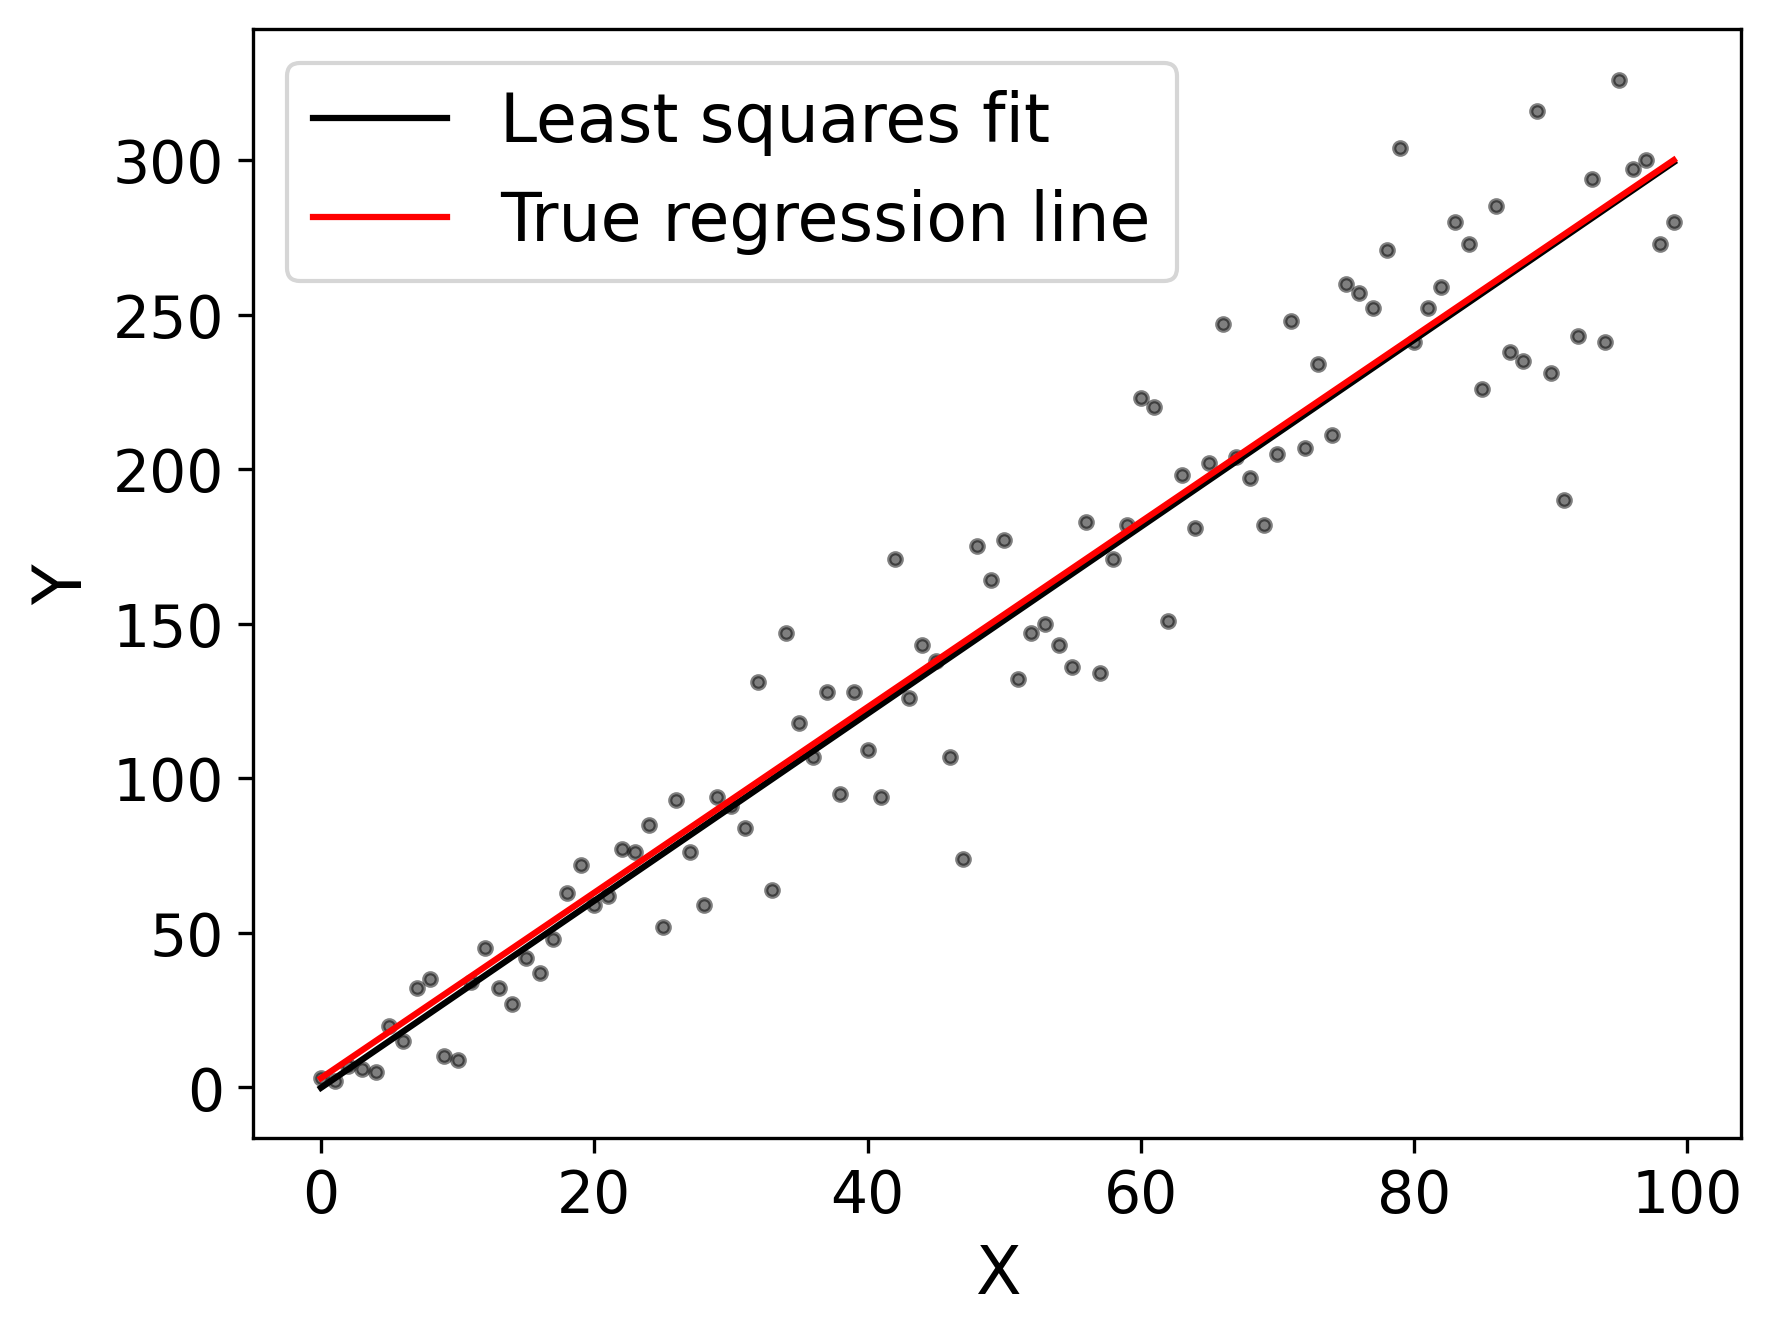

In [5]:
m = model.coef_[0][0]
b = model.intercept_[0]

print('slope: {:.3f}'.format(m))
print('intercept: {:.4f}'.format(b))

plt.plot(x,yp, 'k.', alpha = 0.5)
plt.plot(x, m * x + b, 'k-', label = "Least squares fit")
plt.plot(x, 3 * x + 3, 'r-', label = "True regression line")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Now plot the residuals, i.e. the difference between true regression line and actual data. Are the residuals independent of x? What does this mean? 

**residuals are not independent of x, they get larger as x increases**


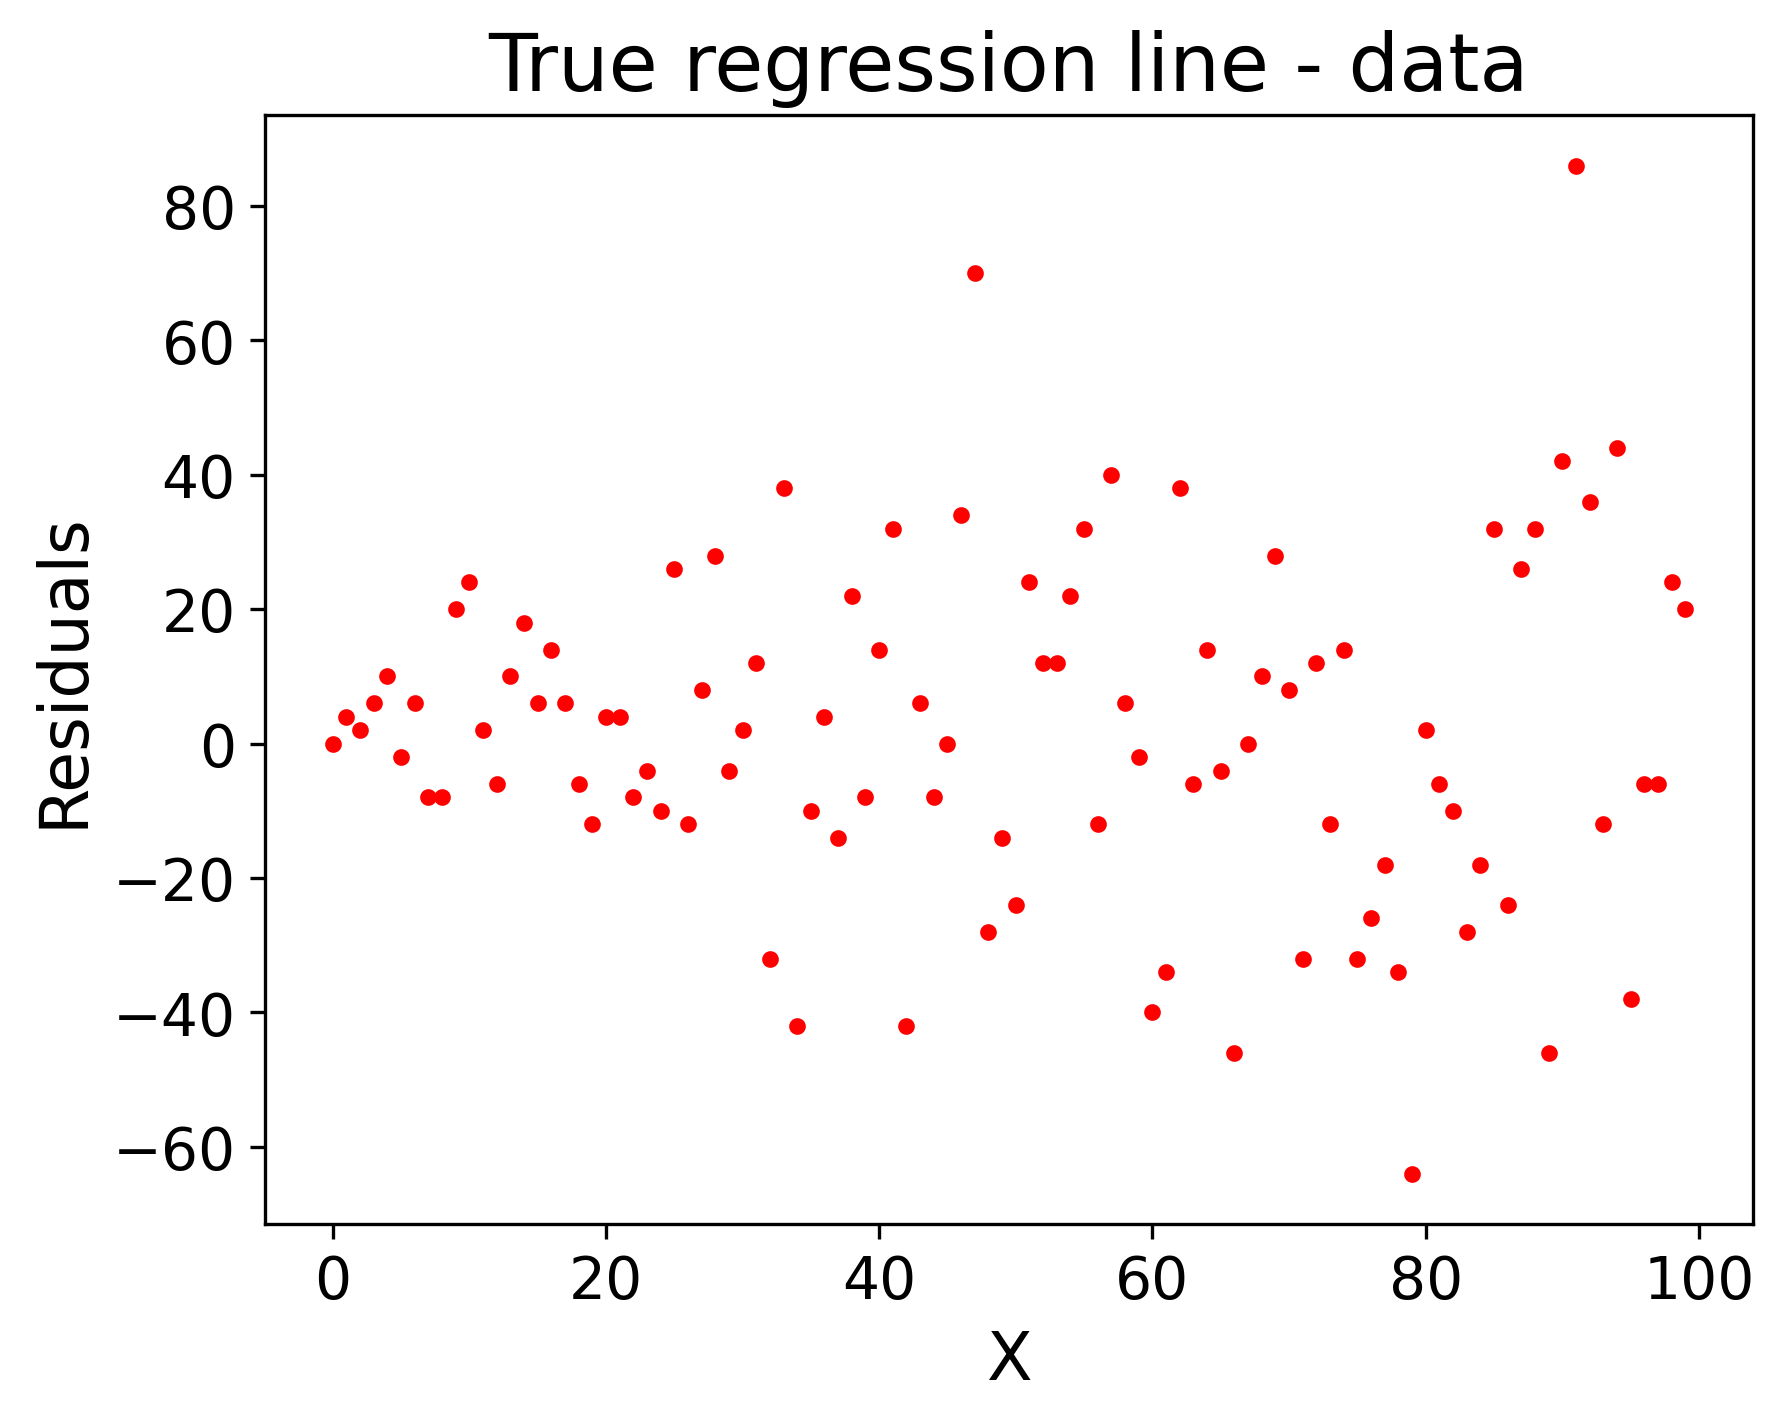

In [6]:
#plt.plot(x,, 'k.', alpha = 0.5)
#plt.plot(x, m * x + b, 'k-', label = "Least squares fit")
plt.plot(x, (3 * x + 3) - y, 'r.')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title("True regression line - data")
plt.show()

We can see that they are not independent of x (the assumptions of the probabilistic linear model are not satisfied). But that doesn't mean we can't create a model.

## Step 2: Analytic solutions

What are the analytic predictions for the coefficients? We can approach this in different ways:

1) Since this is a one-dimensional case, we can use formulas (5.7) and (5.9) to compute slope and intercept.
2) We can also use the covariance formula (5.10) for the slope
3) Finally we can set up the more general "normal" equation (5.13) using linear algebra tools from numpy. (Note: you need to append an additional feature x0=1  to all instances of the feature matrix X, because otherwise we would ignore the bias parameter in our calculation. *np.c_* can be useful.)

Please try all three options:

In [7]:
## 1 
## equation 5.9, 5.7 to determine slope, intercept:
beta_1 = (np.sum(x * (y - np.mean(y)))) / (np.sum(x * (x - np.mean(x))))
beta_0 = np.mean(y) - beta_1 * np.mean(x)

print('slope (5.9): {:.3f}'.format(beta_1))
print('intercept (5.7): {:.4f}'.format(beta_0))

slope (5.9): 3.025
intercept (5.7): -0.1255


In [8]:
### 2
## equation 5.10 to determine slope
beta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y)))/np.sum(((x - np.mean(x))**2))
print('slope (5.10): {:.3f}'.format(beta_1))

slope (5.10): 3.025


In [9]:
#### 3 normal equations

X = np.c_[np.ones(len(x)), x]
beta_0, beta_1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

beta_0 = beta_0[0]
beta_1 = beta_1[0]

print('slope (5.13): {:.3f}'.format(beta_1))
print('intercept (5.13): {:.4f}'.format(beta_0))

slope (5.13): 3.025
intercept (5.13): -0.1255


## Step 3: Cross-validation

We can (and should!) do cross validation and all the nice things we have learned to do for classification problems. Set up k-fold cross-validation with five folds, the default metric and return_train_score=True. Compute the mean and standard deviation of test and train scores

In [10]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 10)
metrics = cross_validate(model, x, y, cv=cv, return_train_score = True)
print('test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))
print('train score: mean = {:.3f}, std = {:.4f}'.format(metrics['train_score'].mean() , metrics['train_score'].std()))

test score: mean = 0.909, std = 0.0363
train score: mean = 0.925, std = 0.0079


### Questions: 

- What are the scores that are being printed out?

**printed above**

- How are the scores? 

**solid for both training data, and test data**

- Does it suffer from high variance? High bias?

**low training error, low test error -> low bias / low variance**

- What would happen to the scores if we increased the scatter (noise)?

**both scores would likely fall, linear regression is prone to underfitting leading to higher bias**

## Step 4: Scoring

sklearn has many possible scoring functions available, see https://scikit-learn.org/stable/modules/model_evaluation.html
Repeat step 3 with mean squared error and mean absolute error as scoring functions.

Something to note is that estimators of performance of the "error" type (in other words, the lower, the better) receive a negative sign in sklearn. This is just to maintain consistency with the "higher score = better" framework.

In [11]:
print('mean squared error')
metrics = cross_validate(model, x, y, cv=cv, return_train_score = True, scoring = 'neg_mean_squared_error')
print('test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))
print('train score: mean = {:.3f}, std = {:.4f}'.format(metrics['train_score'].mean() , metrics['train_score'].std()))

mean squared error
test score: mean = -668.738, std = 174.4224
train score: mean = -612.142, std = 38.1806


In [12]:
print('absolute squared error')
metrics = cross_validate(model, x, y, cv=cv, return_train_score = True, scoring = 'neg_mean_absolute_error')
print('test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))
print('train score: mean = {:.3f}, std = {:.4f}'.format(metrics['train_score'].mean() , metrics['train_score'].std()))

absolute squared error
test score: mean = -19.461, std = 1.9480
train score: mean = -18.925, std = 0.5805


### Custom scores

We might like to implement a scorer where we care about percentage error instead. Here is how to do a custom scorer. Check it out on the data from above.

In [13]:
from sklearn.metrics import make_scorer

In [14]:
def mape(true,pred): #Modified Mean Absolute Percentage Error
    return np.mean(np.abs((true-pred)/(0.5*(true+pred))))

mape_scorer = make_scorer(mape, greater_is_better = False)

## Step 5:  What happens when we add outliers?

In [15]:
np.random.seed(12) #set 
out = np.random.choice(100,15) #select 15 outliers indexes
yp_wo = np.copy(yp)
np.random.seed(12) #set again
yp_wo[out] = yp_wo[out] + 5*np.random.rand(15)*yp[out]

Re-fit the linear model to the new data and plot the original data, the new data and the new fit line in a scatter plot.

slope: 3.978
intercept: 1.5481


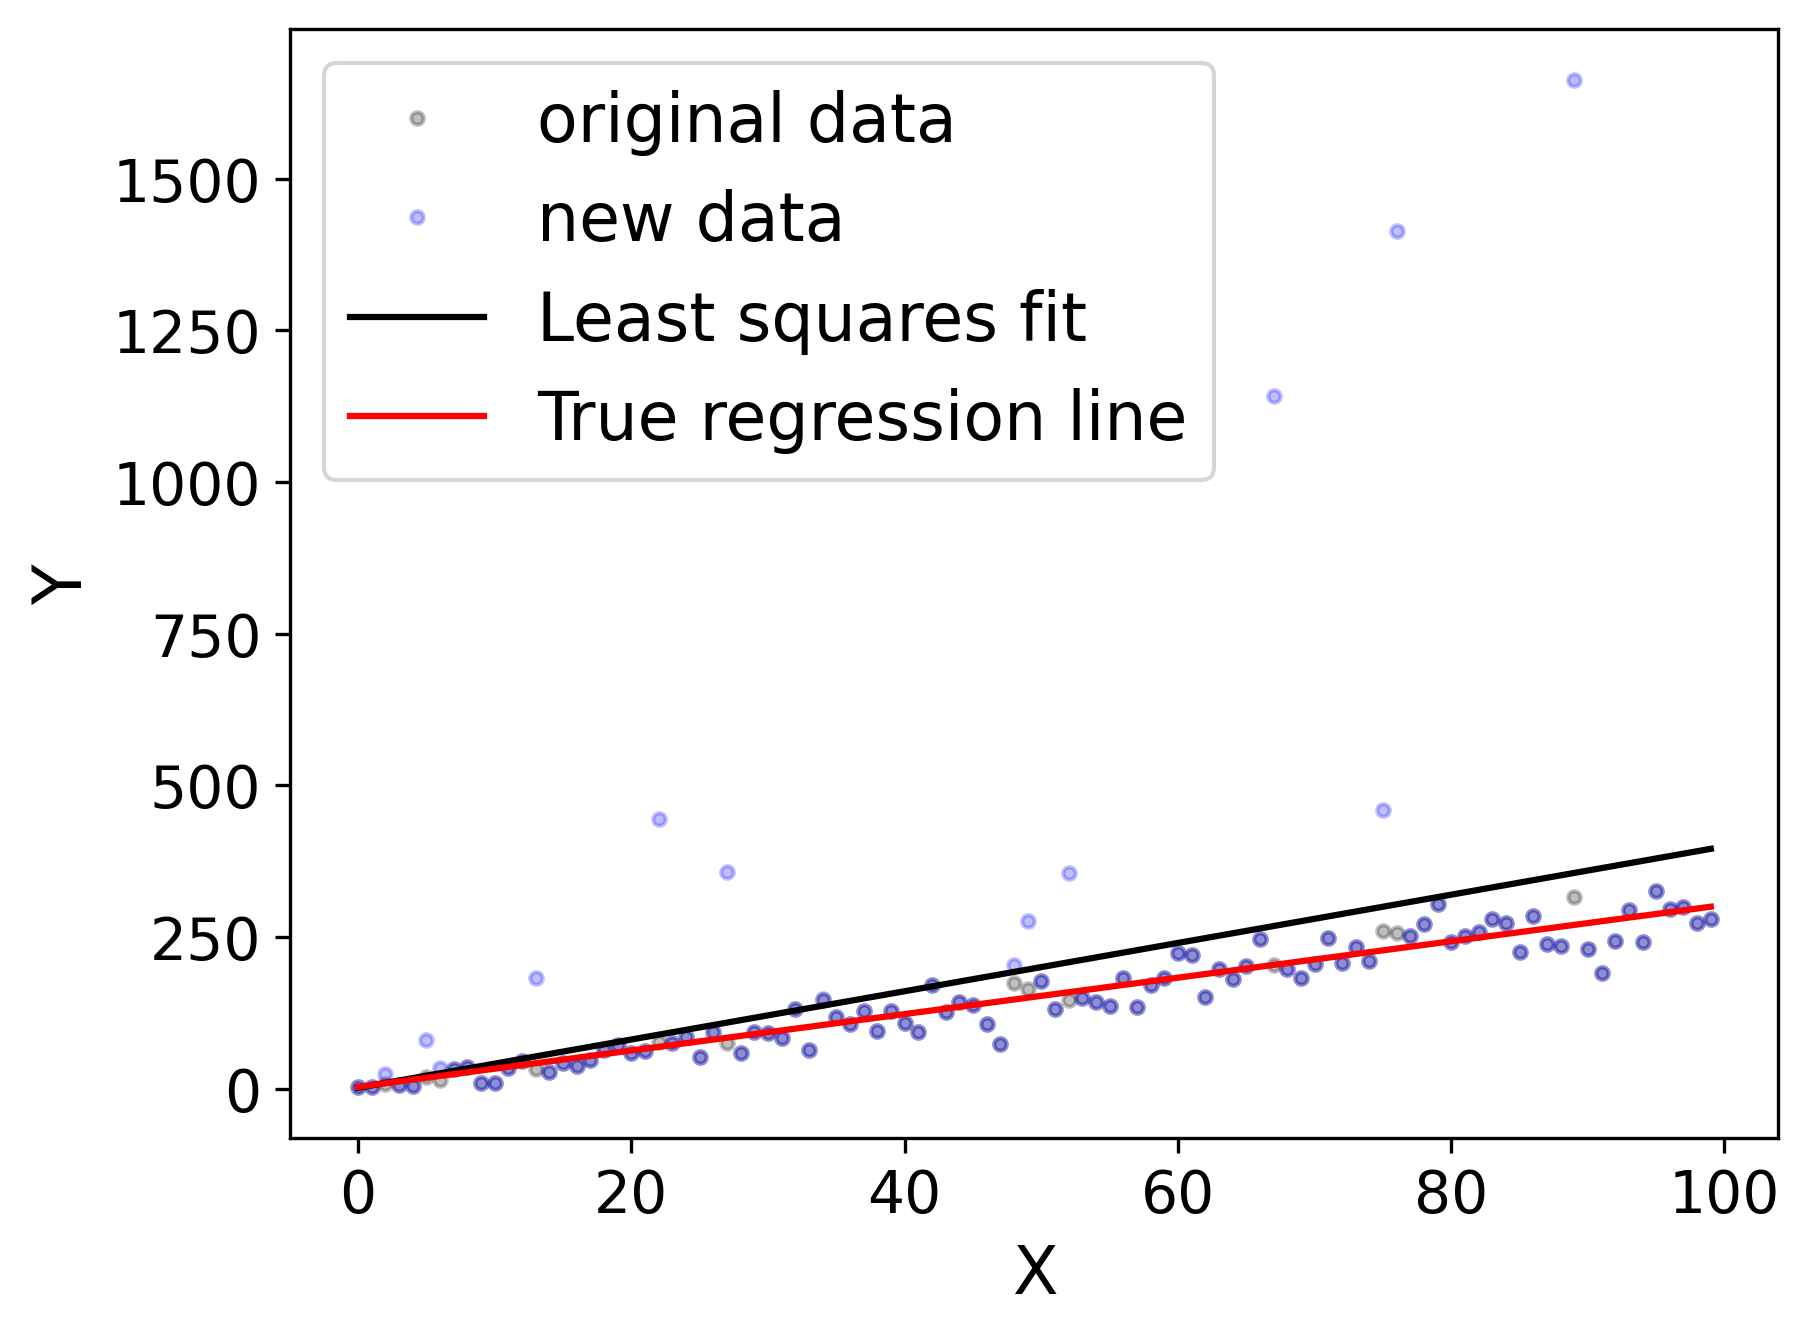

In [16]:
model = linear_model.LinearRegression()
y = yp_wo.reshape(-1,1)
model.fit(x, y)


m = model.coef_[0][0]
b = model.intercept_[0]

print('slope: {:.3f}'.format(m))
print('intercept: {:.4f}'.format(b))

plt.plot(x,yp, 'k.', alpha = 0.25, label = "original data")
plt.plot(x,yp_wo, 'b.', alpha = 0.25, label = "new data")
plt.plot(x, m * x + b, 'k-', label = "Least squares fit")
plt.plot(x, 3 * x + 3, 'r-', label = "True regression line")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Note: as we already discussed, so far we have not changed the loss function (MSE), or the coefficients of the model. We have only looked at different evaluation metrics.

Question 1: Would the best fit line change if we optimize a different loss function? </font>

***- yes it would***

Question 2: How can we implement that without an analytic solution? </font>

 ***- we can create a grid of possible coefficient values, then calculate the loss function for each combination and pick the values associated with the minimum***

## Step 6: Change the loss function

1. Calculate the best fitting coefficients for the MAE (mean absolute error) and compare to the MSE for the data with outliers. You can use a simple grid search as in week 1. Another option is to use *minimize* from *scipy.optimize* to find the coefficients that minmize the different loss functions.

2. Plot the data and the best fits.

3. Explain the results by commenting on the differences.

If you have time, try also computing the Huber loss as a hybrid between MSE and MAE (behaves like MAE when the error is larger than a certain amount, often called delta, so it's less sensitive to outliers). One possibility is to use the std of the y values to set delta.

In [17]:
def mean_abs_error(m,b, y, x):
    
    if len(y) != len(x):
        print("arrays not the right shape")
        return 0
    
    return np.sum(np.abs(y - (m*x + b)))/len(y)

intercepts = np.linspace(-2,5,1000)
slopes = np.linspace(2,4,1000)

abs_errors = np.array([[mean_abs_error(m, b, y, x) for m in slopes] for b in intercepts])

In [18]:
np.where(abs_errors == np.min(abs_errors))

(array([697, 698, 699]), array([531, 531, 531]))

slope: 3.978
intercept: 1.5481


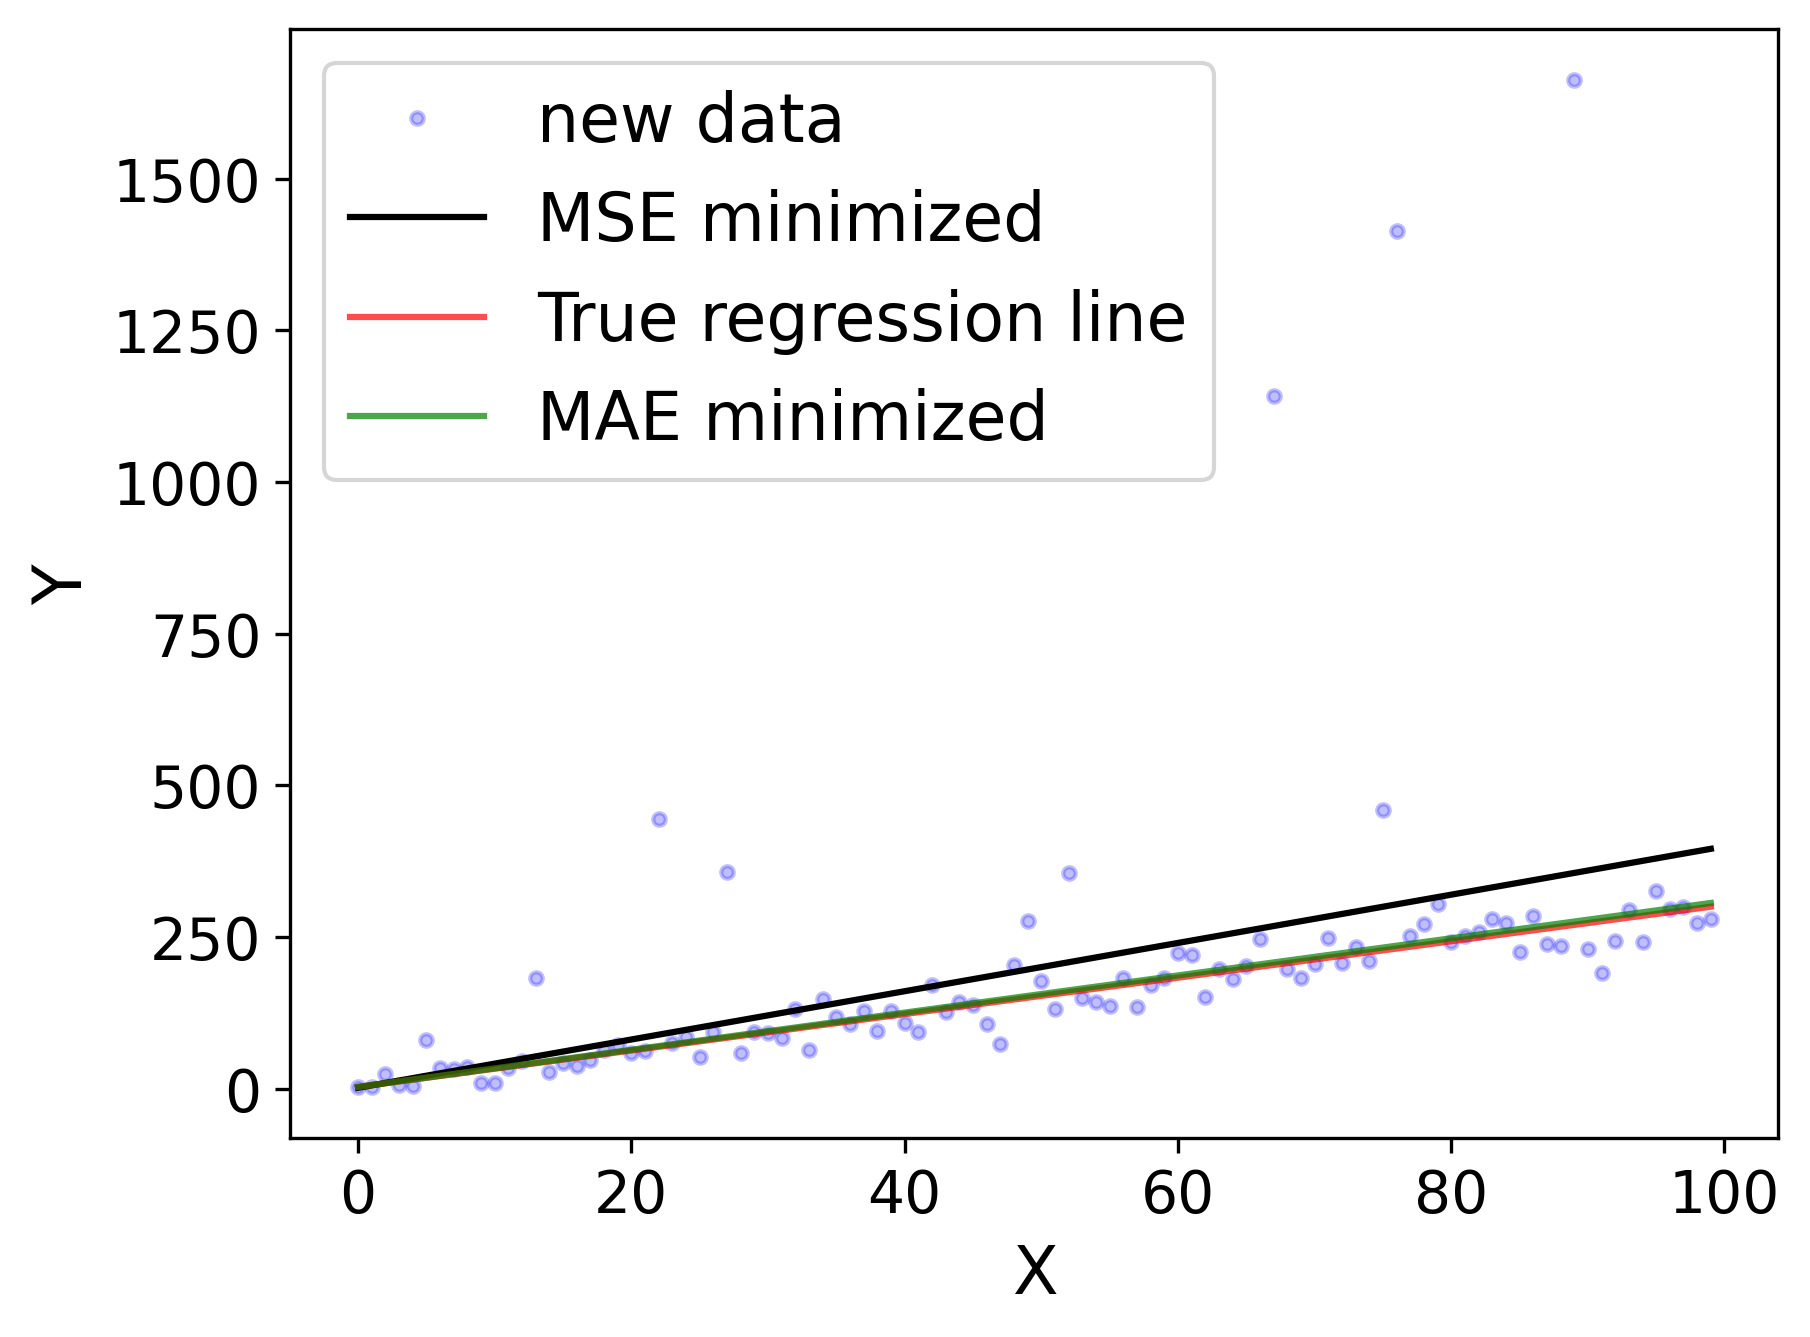

In [19]:

m_a = slopes[531]
b_a = intercepts[698]

print('slope: {:.3f}'.format(m))
print('intercept: {:.4f}'.format(b))

#plt.plot(x,yp, 'k.', alpha = 0.25, label = "original data")
plt.plot(x,yp_wo, 'b.', alpha = 0.25, label = "new data")
plt.plot(x, m * x + b, 'k-', label = "MSE minimized")
plt.plot(x, 3 * x + 3, 'r-', label = "True regression line", alpha = 0.7)
plt.plot(x, m_a * x + b_a, 'g-', label = "MAE minimized", alpha = 0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

***MSE is more sensitive to outliers because we square the residual, giving a lot of weight to outliers. MAE fairs better here because it is not that sensitive to outliers.***